## ¿ Cómo crece una población? 
> ___Mapa logístico___.
La ecuación logística (curva de crecimiento logístico) es un modelo del crecimiento de la población publicado por Pierre Verhulst (1845, 1847). El modelo es continuo en el tiempo, pero una modificación de la ecuación continua a una ecuación de recurrencia discreta conocida como mapa logistico es muy usada.

Referencia: 
- https://es.wikipedia.org/wiki/Aplicación_log%C3%ADstica
- https://en.wikipedia.org/wiki/Logistic_map

___
Entonces remplazando la ecuación lógistica, 

$$\frac{dx}{dt} = r\; x\; (1- x)$$
por la de recurrencia se tiene: 
$ x_{n+1} = r\; x_{n}(1- x_{n})$. Donde $r$ es la razón de crecimiento máximo de la población y $x_{n}$ es la n-ésima iteración. Entonces, lo que tenemos que programar es la siguiente relación recursiva

$$x_{n+1}^{(r)} = f_r(x_n^{(r)}) = rx_n^{(r)}(1-x_n^{(r)})$$

** Solución a la ecuación diferencial ** 

La ecuación diferencial inicial tiene solución analítica, 
$$ x(t) = \frac{1}{1+ (\frac{1}{x_{0}}- 1) e^{-rt}}$$

Numéricamente,¿cómo resolveríamos esta ecuación? 

In [63]:
!open .

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

$$\frac{dx}{dt} = r\; x\; (1- x)$$

In [34]:
r = 1
def poblacion(x, t):
    return r * x * (1 - x)

# Solucion de la ECU dif

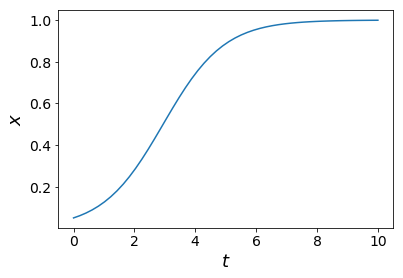

In [54]:
x0 = .05
tt = np.linspace(0, 10)

xx = odeint(poblacion, x0, tt)

plt.plot(tt, xx)
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$x$', fontsize = 18)
plt.show()

Podemos comparar con la solución analítica. En lo que sigue obtenemos varias curvas para $r = (-1, 1)$

In [28]:
def logi_sol(t, x0, r):
    return 1/(1 + (1/x0 - 1) * np.exp(-r * t))

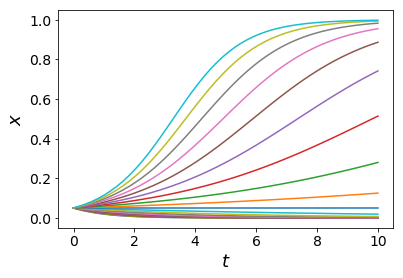

In [29]:
t = np.linspace(0,10)
for r in np.arange(-1, 1,.1):
    plt.plot(t, logi_sol(t, 0.05, r))
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$x$', fontsize = 18)
plt.show()

Como podemos ver, la solución a está ecuación en el continuo nos puede ganantizar la extinción o bien un crecimiento descomunal, dependiendo del valor asignado a $r$. 

### Mapa logístico

In [ ]:
r=3.99
#r=3.1
#r=3.5

In [56]:
import numpy as np
def mapa_logistico(r, x):
    return r * x * (1 - x)

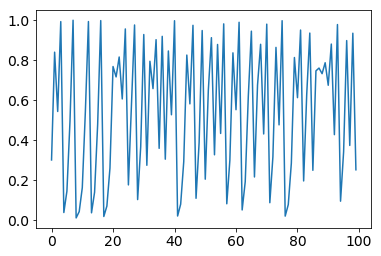

In [62]:
r=3.99
n=100
x=np.zeros(n)
x[0]=0.3

for i in range (n-1):
    x[i+1] = mapa_logistico(r,x[i])

plt.plot(np.arange(0,n),x)

In [34]:
# Para mil valores de r entre 2.5 y 4.0
n = 1000
r = np.linspace(.5, 4.0, n)

In [35]:
# Hacemos 1000 iteraciones y nos quedamos con las ultimas 100
iterar = 1000
ultimos = 100

In [36]:
# La misma condición inicial para todos los casos. 
x = 1e-5 * np.ones(n)

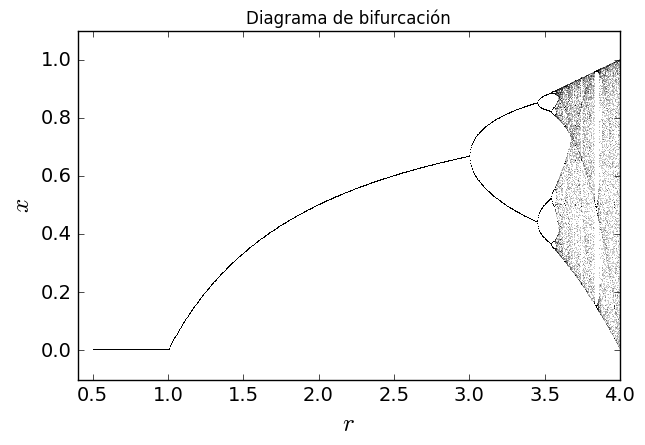

In [37]:
plt.figure(figsize=(7, 4.5))
for i in range(iterar):
    x = mapa_logistico(r, x)
    if i >= (iterar - ultimos):
        plt.plot(r, x, ',k', alpha=.2)
plt.xlim(.4, 4)
plt.ylim(-.1, 1.1)
plt.title("Diagrama de bifurcación")
plt.xlabel('$r$', fontsize=18)
plt.ylabel('$x$', fontsize=18)
plt.show()

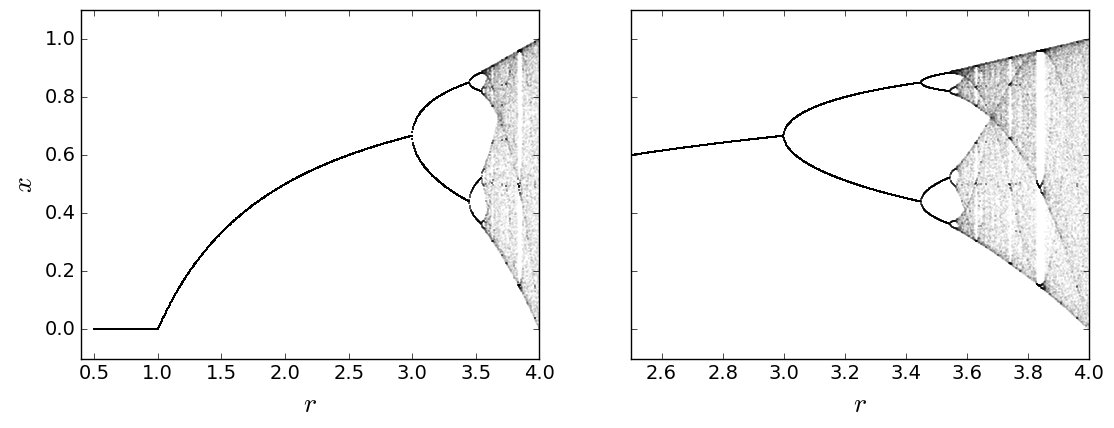

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',figsize =(13,4.5))
r = np.linspace(.5, 4.0, n)
for i in range(iterar):
    x = mapa_logistico(r, x)
    if i >= (iterar - ultimos):
        ax1.plot(r, x, '.k', alpha=1,  ms = .1)
r = np.linspace(2.5, 4.0, n)
for i in range(iterar):
    x = mapa_logistico(r, x)
    if i >= (iterar - ultimos):
        ax2.plot(r, x, '.k', alpha=1, ms = .1)
ax1.set_xlim(.4, 4)
ax1.set_ylim(-.1, 1.1)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-.1, 1.1)
ax1.set_ylabel('$x$', fontsize = 20)
ax1.set_xlabel('$r$', fontsize = 20)
ax2.set_xlabel('$r$', fontsize = 20)
plt.show()

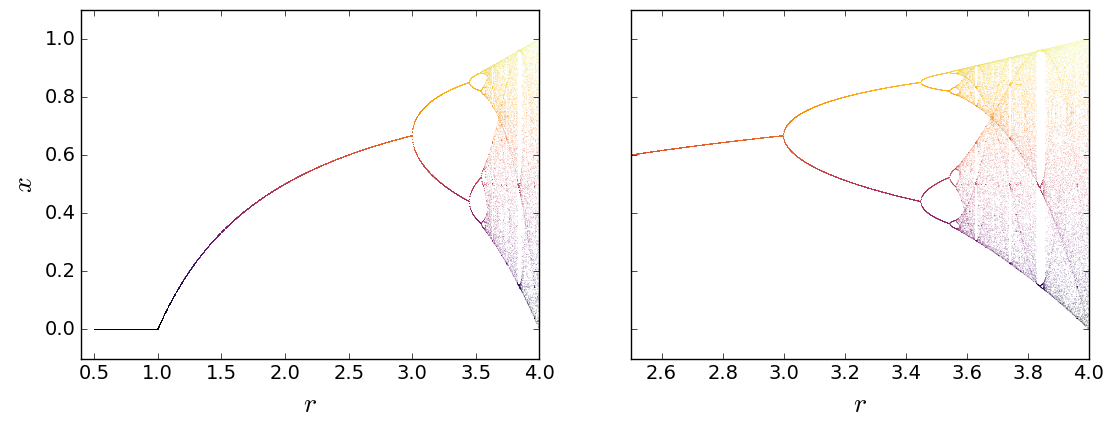

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',figsize =(13,4.5))
r = np.linspace(.5, 4.0, n)
for i in range(iterar):
    x = mapa_logistico(r, x)
    if i >= (iterar - ultimos):
        ax1.scatter(r, x,  s = .1, cmap= 'inferno', c = x, lw = 0)
r = np.linspace(2.5, 4.0, n)
for i in range(iterar):
    x = mapa_logistico(r, x)
    if i >= (iterar - ultimos):
        ax2.scatter(r, x, s = .1, cmap = 'inferno', c = x, lw = 0)
ax1.set_xlim(.4, 4)
ax1.set_ylim(-.1, 1.1)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-.1, 1.1)
ax1.set_ylabel('$x$', fontsize = 20)
ax1.set_xlabel('$r$', fontsize = 20)
ax2.set_xlabel('$r$', fontsize = 20)
plt.show()

Esta última opción ya no es tan buena, porque son demasiados puntos y el uso de memoria aumenta. 

## Big data, insane! 

### Gráficando el mapeo logístico de forma circular
Se gráfica el `seno` y el `coseno`de un ángulo que va aumentando gradualmente, multiplicado por el valor de `x`, el cual también va cambiando con cada iteración. Vamos a necesitar millones de puntos. 

\begin{align}
X &= x \,R \cos(\theta)\\
Y &= x \,R \sin(\theta)
\end{align}

Vamos a considerar un ángulo inicial $\theta_0 = 0 $, $R =1$ y un incremento $\delta \theta = 0.2$.

<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_dead_1.png" width="150px" height="50px" />
<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive_1.png" width="150px" height="50px" />
<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive2_1.png" width="150px" height="50px" />
<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive4_1.png" width="150px" height="50px" />
<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive_chaos1_1.png" width="150px" height="50px" />

<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive_chaos2_1.png" width="150px" height="50px" />
<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive_chaos3_1.png" width="150px" height="50px" />
<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive_stable_1.png" width="150px" height="50px" />
<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive_chaos4_1.png" width="150px" height="50px" />
<img style="float: left; margin: 0px 0px 15px 0px;" src="./circular_maps/map_alive_chaos5_1.png" width="150px" height="50px" />

Los valores de $r$ utilizados para contruir las figuras de arriba son los siguientes** _(de izquierda a derecha e iniciando con el panel superior)_: **

$$r = 0.9,\, 2.5,\, 3.2,\, 3.46,\,  3.57,\,  3.59,\, 3.64,\, 3.83,\, 3.9,\, 3.99$$

### A continuación se describe la construcción de las figuras anteriores. 

- https://github.com/bokeh/datashader

`conda install -c bokeh datashader`

In [480]:
import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9, inferno, viridis
from datashader.utils import export_image
from functools import partial
background = "black"

In [481]:
img_map = partial(export_image, export_path="circular_maps", background=background)

In [482]:
def circular_map(r1, theta, dtheta, radius, iterar):
    r = np.array([r1])
    x = np.array([1e-5])
    x_list, y_list = [], []
    for i in range(iterar):
        x = mapa_logistico(r, x)
        X = x * radius * np.cos(theta)
        Y = x * radius * np.sin(theta)
        x_list.append(X[0])
        y_list.append(Y[0])
        theta = theta + dtheta
    return x_list, y_list

Los valores de $r$ los vamos a elegir en los puntos de transición en el diagrama de bifurcación. 

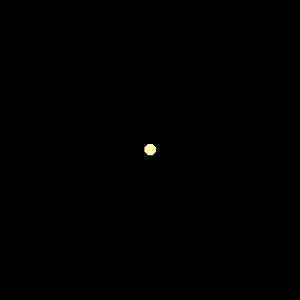

In [483]:
x_list, y_list = circular_map(.9, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1,1), y_range=(-1,1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img = tf.dynspread(img, threshold=1, max_px= 5)
img_map(img,"map_dead")

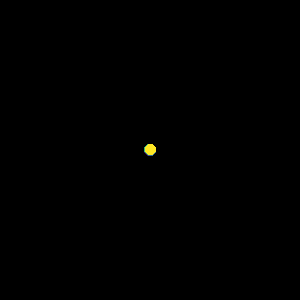

In [484]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img = tf.dynspread(img, threshold=1, max_px= 5)
img_map(img,"map_dead_1")

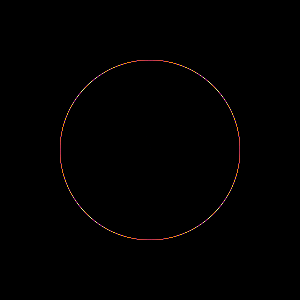

In [485]:
x_list, y_list = circular_map(2.5, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1,1), y_range=(-1,1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
#img = tf.dynspread(img, threshold=1, max_px= 1)
img_map(img,"map_alive")

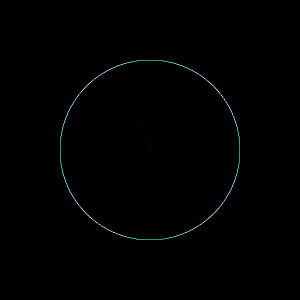

In [486]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
#img = tf.dynspread(img, threshold=1, max_px= 1)
img_map(img,"map_alive_1")

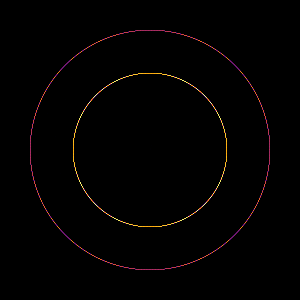

In [487]:
x_list, y_list = circular_map(3.2, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1,1), y_range=(-1,1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive2")

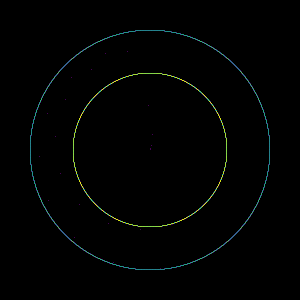

In [488]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive2_1")

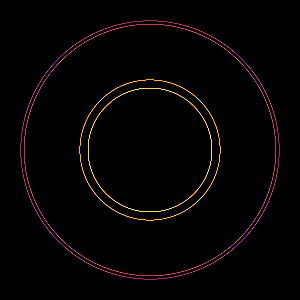

In [489]:
x_list, y_list = circular_map(3.46, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1,1), y_range=(-1,1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive4")

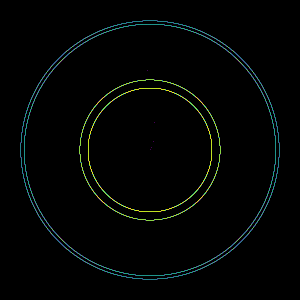

In [490]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive4_1")

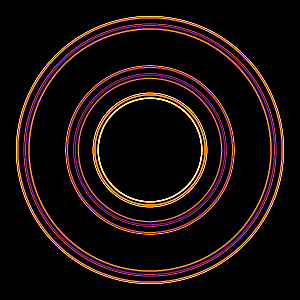

In [491]:
x_list, y_list = circular_map(3.57, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1,1), y_range=(-1,1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive_chaos1")

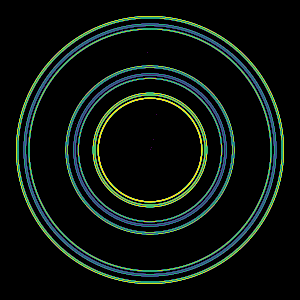

In [492]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive_chaos1_1")

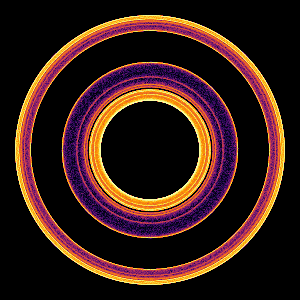

In [493]:
x_list, y_list = circular_map(3.59, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1,1), y_range=(-1,1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive_chaos2")

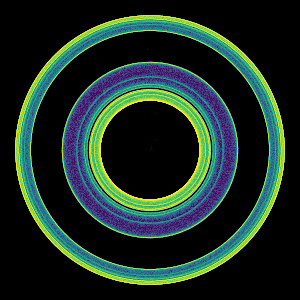

In [494]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive_chaos2_1")

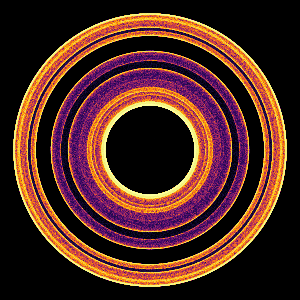

In [495]:
x_list, y_list = circular_map(3.64, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1,1), y_range=(-1,1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive_chaos3")

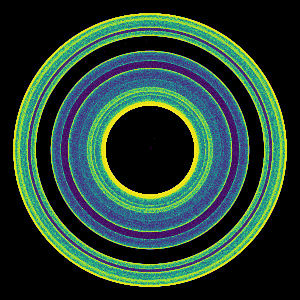

In [496]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive_chaos3_1")

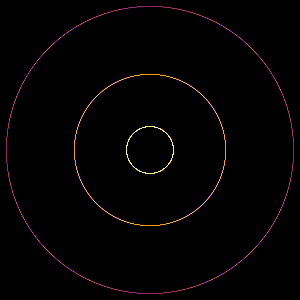

In [497]:
x_list, y_list = circular_map(3.83, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1,1), y_range=(-1,1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive_stable")

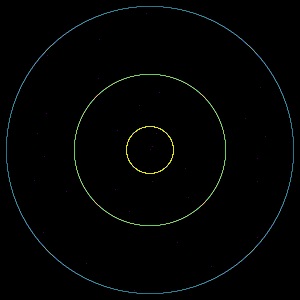

In [498]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive_stable_1")

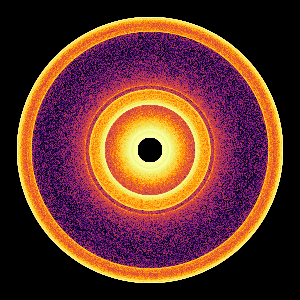

In [499]:
x_list, y_list = circular_map(3.9, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1.1,1.1), y_range=(-1.1,1.1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive_chaos4")

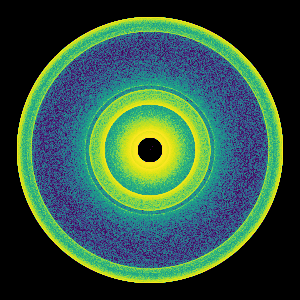

In [500]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive_chaos4_1")

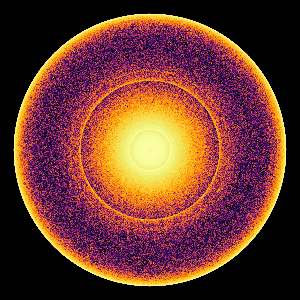

In [501]:
x_list, y_list = circular_map(3.99, 0, 0.2, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1.1,1.1), y_range=(-1.1,1.1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive_chaos5")

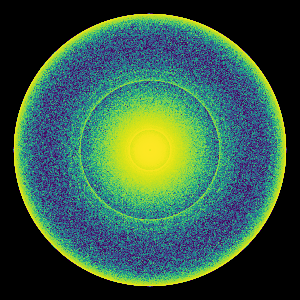

In [502]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive_chaos5_1")

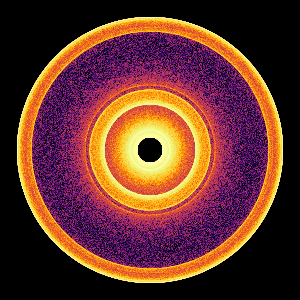

In [510]:
x_list, y_list = circular_map(3.9, 0, 0.1, 1, 3000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)
cvs1 = ds.Canvas(plot_width=300, plot_height=300, x_range=(-1.1,1.1), y_range=(-1.1,1.1))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"map_alive_chaos6")

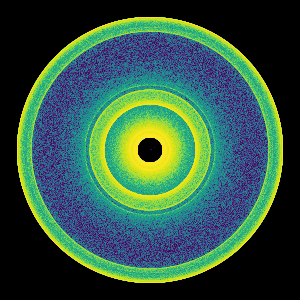

In [511]:
img = tf.shade(agg1, cmap = viridis, how='eq_hist')
img_map(img,"map_alive_chaos6_1")

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso.
</footer>